# Sales Analysis

#### Import necessary libraries

In [2]:
import pandas as pd

#### Read in updated dataframe

In [3]:
Sales_df = pd.read_csv("Sales.csv")
Sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
Cleaning up data is an essential step in any data analysis or machine learning project. It involves identifying and correcting errors, inconsistencies, and missing values in the dataset to ensure its quality and reliability.


##### Drop rows of NAN

In [4]:
# Find NAN
nan_df = Sales_df[Sales_df.isna().any(axis=1)]
display(nan_df.head())

Sales_df = Sales_df.dropna(how='all')
Sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [5]:
Sales_df = Sales_df[Sales_df['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [6]:
Sales_df['Quantity Ordered'] = pd.to_numeric(Sales_df['Quantity Ordered'])
Sales_df['Price Each'] = pd.to_numeric(Sales_df['Price Each'])

### Augment data with additional columns

#### Add month column

In [7]:
Sales_df['Month'] = Sales_df['Order Date'].str[0:2]
Sales_df['Month'] = Sales_df['Month'].astype('int32')
Sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [8]:
Sales_df['Month 2'] = pd.to_datetime(Sales_df['Order Date']).dt.month
Sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

Sales_df['City'] = Sales_df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
Sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
Sales_df['Sales'] = Sales_df['Quantity Ordered'].astype('int') * Sales_df['Price Each'].astype('float')

In [11]:
Sales_df.groupby('Month').agg({'Sales': 'sum'})

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


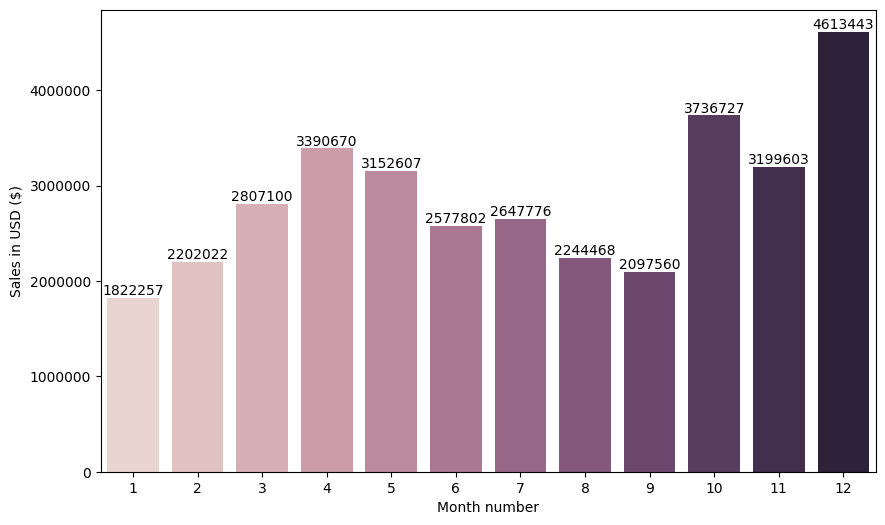

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Define a different color palette

# Calculate total sales for each month
monthly_sales = Sales_df.groupby('Month')['Sales'].sum(numeric_only=False)

# Plotting using Seaborn
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, legend=False)

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Disable scientific notation for y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Display sales numbers on the bars
for i, sales in enumerate(monthly_sales):
    plt.text(i, sales, f'{sales:.0f}', ha='center', va='bottom')

plt.show()


#### Question 2: What city sold the most product?

In [13]:
Sales_df.groupby(['City']).sum(numeric_only=True)


,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


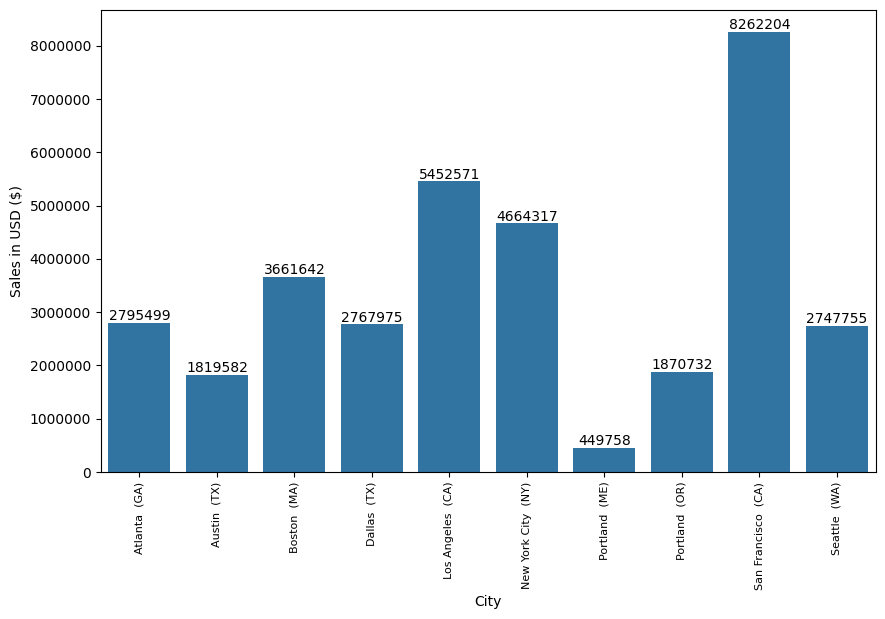

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the keys (city names) sorted alphabetically
keys = sorted([city for city, df in Sales_df.groupby('City')])

plt.figure(figsize=(10, 6))

# Use Seaborn color palette

# Calculate total sales for each city (numeric column only)
monthly_sales = Sales_df.groupby('City')['Sales'].sum()

# Plot the bar chart with Seaborn
sns.barplot(x=keys, y=monthly_sales)

plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.ticklabel_format(style='plain', axis='y')

# Display sales values on the bars
for i, sales in enumerate(monthly_sales):
    plt.text(i, sales, f'{sales:.0f}', ha='center', va='bottom')

plt.xticks(rotation='vertical', size=8)
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Add hour column
Sales_df['Hour'] = pd.to_datetime(Sales_df['Order Date']).dt.hour
Sales_df['Minute'] = pd.to_datetime(Sales_df['Order Date']).dt.minute
Sales_df['Count'] = 1
Sales_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


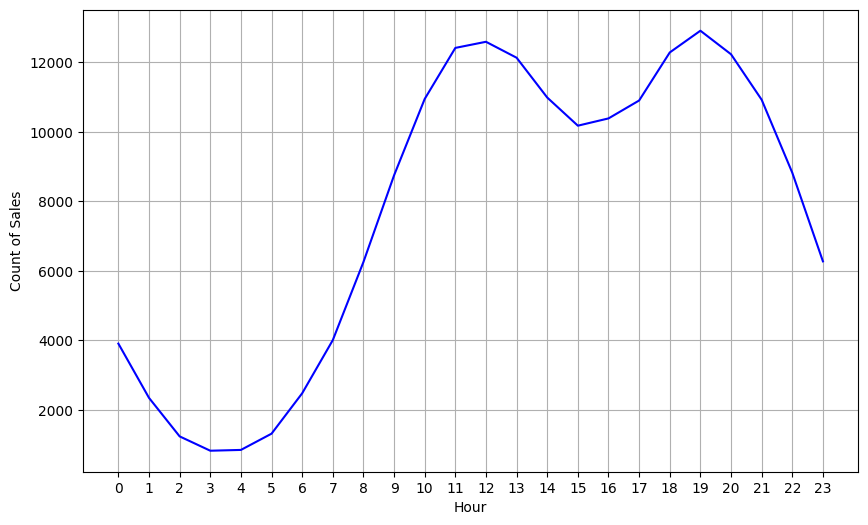

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the keys (hour values)
keys = sorted(Sales_df['Hour'].unique())

plt.figure(figsize=(10, 6))

# Plot line plot using Seaborn with default color palette
sns.lineplot(x='Hour', y='Count', data=Sales_df.groupby('Hour').count().reset_index(), color='blue')

plt.xlabel('Hour')
plt.ylabel('Count of Sales')
plt.xticks(keys)
plt.grid()

# Recommendation: Highlight the time range slightly before 11am and 7pm


plt.show()


#### Question 4: What products are most often sold together?

In [17]:
df = Sales_df[Sales_df['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most?

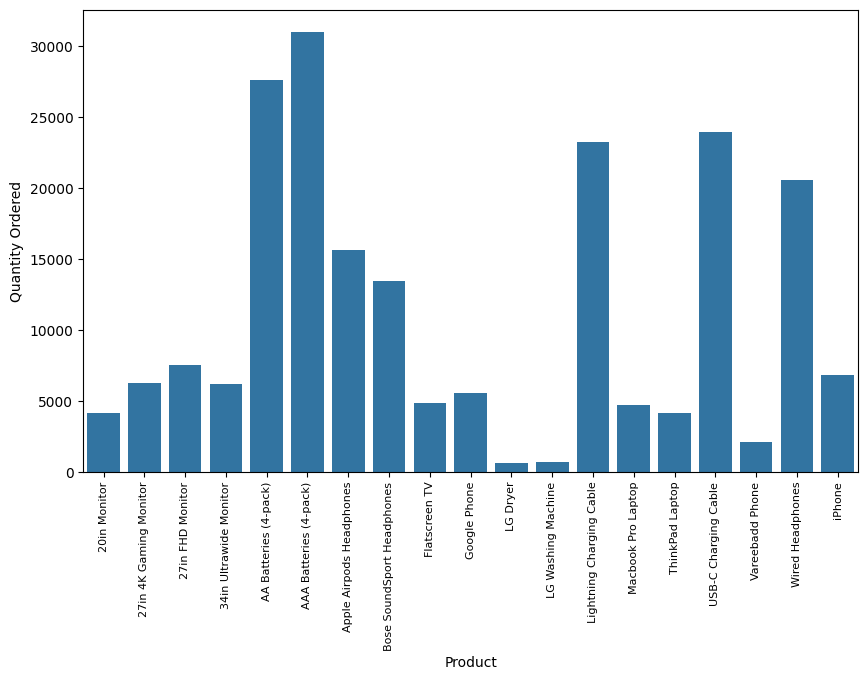

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'Product' and summing the 'Quantity Ordered'
product_group = Sales_df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Define the color palette (you can choose any Seaborn color palette)

plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x='Product', y='Quantity Ordered', data=product_group)

plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation='vertical', size=8)
plt.show()


<ipython-input-20-5652b7578368>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = Sales_df.groupby('Product').mean()['Price Each']
<ipython-input-20-5652b7578368>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = Sales_df.groupby('Product').sum()['Quantity Ordered']  # Define quantity_ordered here


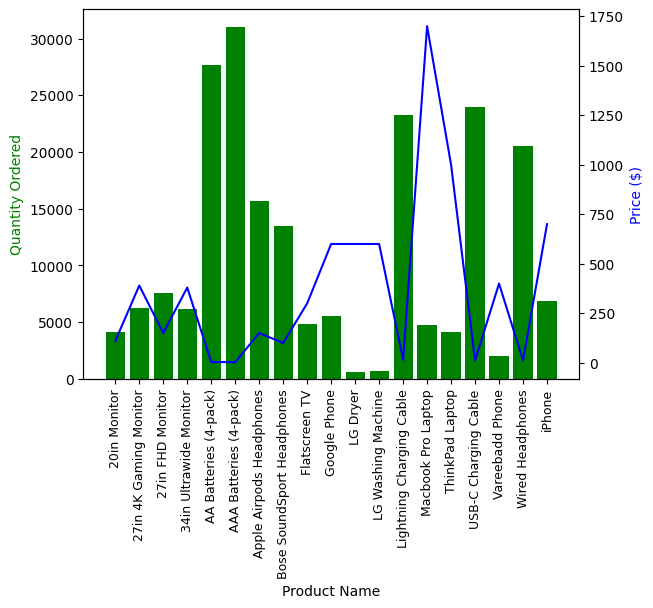

In [20]:
prices = Sales_df.groupby('Product').mean()['Price Each']
quantity_ordered = Sales_df.groupby('Product').sum()['Quantity Ordered']  # Define quantity_ordered here

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prices.index, quantity_ordered, color='g')  # Use prices.index instead of undefined variable keys
ax2.plot(prices.index, prices, color='b')  # Use prices.index instead of undefined variable keys

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set the tick positions and labels for the x-axis
ax1.set_xticks(prices.index)
ax1.set_xticklabels(prices.index, rotation='vertical', size=9)  # Use prices.index for x-axis labels

plt.show()


In [21]:
Sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9,Los Angeles (CA),8.97,20,56,1
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9,San Francisco (CA),700.00,16,0,1
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9,San Francisco (CA),700.00,7,39,1
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9,San Francisco (CA),379.99,17,30,1


In [23]:
!pip install usaddress


In [24]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [25]:
import pandas as pd
from usaddress import tag
# from collections import Counter

# Assuming Sales_df is your DataFrame containing the 'Purchase Address' column

# Step 1: Address Validation using usaddress library
def validate_address(address):
    try:
        parsed_address = tag(address)[0]
        return parsed_address
    except Exception as e:
        print(f"Error parsing address: {address}")
        return None

Sales_df['Validated Address'] = Sales_df['Purchase Address'].apply(validate_address)




In [26]:
selected_columns = ['Sales', 'Quantity Ordered']  # Specify the columns you want to include in the sum

sum_by_address = Sales_df.groupby('Purchase Address')[selected_columns].sum()

# Sort the DataFrame by 'Sales' column in descending order and select the top 10 rows
top_10_sales_by_address = sum_by_address.sort_values(by='Sales', ascending=False).head(10)

print(top_10_sales_by_address)


                                            Sales  Quantity Ordered
Purchase Address                                                   
668 Park St, San Francisco, CA 94016      4379.99                 4
795 1st St, Atlanta, GA 30301             4100.00                 3
391 1st St, Seattle, WA 98101             4100.00                 3
10 1st St, San Francisco, CA 94016        4000.00                 3
731 11th St, New York City, NY 10001      3919.88                 6
208 Chestnut St, San Francisco, CA 94016  3789.99                 3
949 Hickory St, New York City, NY 10001   3779.99                 3
611 Wilson St, San Francisco, CA 94016    3718.78                 6
610 14th St, Los Angeles, CA 90001        3699.98                 3
256 Hill St, San Francisco, CA 94016      3561.95                 4


In [ ]:
# Assuming you want to see details for a specific address, let's say "123 Main St, Anytown, USA"
specific_address = "668 Park St, San Francisco, CA 94016"

# Filter the DataFrame for the specific address
address_details = Sales_df[Sales_df['Purchase Address'] == specific_address]

# Display the details for the specific address
print(address_details)


In [33]:
selected_columns = ['Quantity Ordered']  # Specify the columns you want to include in the sum

sum_by_Product = Sales_df.groupby('Product')[selected_columns].sum()

# Sort the DataFrame by 'Sales' column in descending order and select the top 10 rows
top_10_sale_by_Product = sum_by_Product.sort_values(by='Quantity Ordered', ascending=False).head(10)

print(top_10_sale_by_Product)

                            Quantity Ordered
Product                                     
AAA Batteries (4-pack)                 31017
AA Batteries (4-pack)                  27635
USB-C Charging Cable                   23975
Lightning Charging Cable               23217
Wired Headphones                       20557
Apple Airpods Headphones               15661
Bose SoundSport Headphones             13457
27in FHD Monitor                        7550
iPhone                                  6849
27in 4K Gaming Monitor                  6244
